<a href="https://colab.research.google.com/github/pseeej/SmartSystemsSoftware/blob/master/BigdataAnalysisInBiz/5%EC%A3%BC%EC%B0%A8_%EB%85%B9%ED%99%94_%EB%B0%8F_%EC%8B%A4%EC%8B%9C%EA%B0%84_%EA%B0%95%EC%9D%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

교재 : SQL로 맛보는 데이터 전처리 분석, 노수영

**실습 참고자료**

https://www.sqlitetutorial.net/
<br>https://www.w3schools.com/sql/default.asp

#실습환경 셋업

## 1) sqlite 업그레이드

In [2]:
!apt-get update
!apt-get upgrade sqlite3
!sudo apt-get install python3-dev default-libmysqlclient-dev
!pip install pymysql

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 http://security.ubuntu.com/ubuntu bionic-security/restricted amd64 Packages [607 kB]
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:13 http:

In [3]:
!curl https://www.sqlite.org/src/tarball/sqlite.tar.gz?r=release | tar xz
%cd sqlite/
!./configure
!make sqlite3.c
%cd /content
!npx degit coleifer/pysqlite3 -f
!cp sqlite/sqlite3.[ch] .
!python setup.py build_static build
!cp build/lib.linux-x86_64-3.7/pysqlite3/_sqlite3.cpython-37m-x86_64-linux-gnu.so \
     /usr/lib/python3.7/lib-dynload/


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 10.9M  100 10.9M    0     0   9.9M      0  0:00:01  0:00:01 --:--:--  9.9M
/content/sqlite
checking build system type... x86_64-pc-linux-gnu
checking host system type... x86_64-pc-linux-gnu
checking for gcc... gcc
checking whether the C compiler works... yes
checking for C compiler default output file name... a.out
checking for suffix of executables... 
checking whether we are cross compiling... no
checking for suffix of object files... o
checking whether we are using the GNU C compiler... yes
checking whether gcc accepts -g... yes
checking for gcc option to accept ISO C89... none needed
checking for a sed that does not truncate output... /bin/sed
checking for grep that handles long lines and -e... /bin/grep
checking for egrep... /bin/grep -E
checking for fgrep... /bin/grep -F
checking for ld used by gcc... /usr/bin/ld
checkin

In [4]:
# 메뉴 런타임 > 런타임 다시 시작 후 셀 실행
import pandas as pd
import sqlite3
sqlite3.sqlite_version  # 3.36.0

'3.22.0'

## 2) 데이터베이스 다운로드

In [5]:
import gdown

url = 'https://drive.google.com/uc?id=1iTVsBZLU8GtqSIy0iZ1A4Wp4ZZMuNoUM'
output = 'classicmodels.db'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1iTVsBZLU8GtqSIy0iZ1A4Wp4ZZMuNoUM
To: /content/classicmodels.db
100%|██████████| 311k/311k [00:00<00:00, 49.4MB/s]


'classicmodels.db'

## 3) 데이터베이스 연결

In [6]:
conn = sqlite3.connect("classicmodels.db")
cur = conn.cursor()

## 4) 데이터베이스 테이블 조회 테스트

In [7]:
def viewlimit(table, cutlimit):
  sql = "SELECT * FROM " + table + " LIMIT " + cutlimit + ";"
  cur.execute(sql)
  rows = cur.fetchall()
  print(sql)
  for row in rows:
    print(row)

In [8]:
viewlimit("customers","10")

SELECT * FROM customers LIMIT 10;
(103, 'Atelier graphique', 'Schmitt', 'Carine ', '40.32.2555', '54, rue Royale', None, 'Nantes', None, '44000', 'France', 1370, 21000)
(112, 'Signal Gift Stores', 'King', 'Jean', '7025551838', '8489 Strong St.', None, 'Las Vegas', 'NV', '83030', 'USA', 1166, 71800)
(114, 'Australian Collectors, Co.', 'Ferguson', 'Peter', '03 9520 4555', '636 St Kilda Road', 'Level 3', 'Melbourne', 'Victoria', '3004', 'Australia', 1611, 117300)
(119, 'La Rochelle Gifts', 'Labrune', 'Janine ', '40.67.8555', '67, rue des Cinquante Otages', None, 'Nantes', None, '44000', 'France', 1370, 118200)
(121, 'Baane Mini Imports', 'Bergulfsen', 'Jonas ', '07-98 9555', 'Erling Skakkes gate 78', None, 'Stavern', None, '4110', 'Norway', 1504, 81700)
(124, 'Mini Gifts Distributors Ltd.', 'Nelson', 'Susan', '4155551450', '5677 Strong St.', None, 'San Rafael', 'CA', '97562', 'USA', 1165, 210500)
(125, 'Havel & Zbyszek Co', 'Piestrzeniewicz', 'Zbyszek ', '(26) 642-7555', 'ul. Filtrowa 68'

## 5) Pandas 함수로 데이터 조회 및 결과 확인

In [9]:
window_sql = f"""
select *
  from customers
 limit 100
"""
df = pd.read_sql(window_sql, conn, index_col=None)
df.head(10)

,customerNumber,customerName,contactLastName,contactFirstName,phone,addressLine1,addressLine2,city,state,postalCode,country,salesRepEmployeeNumber,creditLimit
0,103,Atelier graphique,Schmitt,Carine,40.32.2555,"54, rue Royale",None,Nantes,None,44000,France,1370.0,21000
1,112,Signal Gift Stores,King,Jean,7025551838,8489 Strong St.,None,Las Vegas,NV,83030,USA,1166.0,71800
2,114,"Australian Collectors, Co.",Ferguson,Peter,03 9520 4555,636 St Kilda Road,Level 3,Melbourne,Victoria,3004,Australia,1611.0,117300
3,119,La Rochelle Gifts,Labrune,Janine,40.67.8555,"67, rue des Cinquante Otages",None,Nantes,None,44000,France,1370.0,118200
4,121,Baane Mini Imports,Bergulfsen,Jonas,07-98 9555,Erling Skakkes gate 78,None,Stavern,None,4110,Norway,1504.0,81700
5,124,Mini Gifts Distributors Ltd.,Nelson,Susan,4155551450,5677 Strong St.,None,San Rafael,CA,97562,USA,1165.0,210500
6,125,Havel & Zbyszek Co,Piestrzeniewicz,Zbyszek,(26) 642-7555,ul. Filtrowa 68,None,Warszawa,None,01-012,Poland,NaN,0
7,128,"Blauer See Auto, Co.",Keitel,Roland,+49 69 66 90 2555,Lyonerstr. 34,None,Frankfurt,None,60528,Germany,1504.0,59700
8,129,Mini Wheels Co.,Murphy,Julie,6505555787,5557 North Pendale Street,None,San Francisco,CA,94217,USA,1165.0,64600
9,131,Land of Toys Inc.,Lee,Kwai,2125557818,897 Long Airport Avenue,None,NYC,NY,10022,USA,1323.0,114900


In [10]:
df.tail(10)

,customerNumber,customerName,contactLastName,contactFirstName,phone,addressLine1,addressLine2,city,state,postalCode,country,salesRepEmployeeNumber,creditLimit
90,382,Salzburg Collectables,Pipps,Georg,6562-9555,Geislweg 14,None,Salzburg,None,5020,Austria,1401.0,71700
91,385,Cruz & Sons Co.,Cruz,Arnold,+63 2 555 3587,15 McCallum Street,NatWest Center #13-03,Makati City,None,1227 MM,Philippines,1621.0,81500
92,386,L'ordine Souveniers,Moroni,Maurizio,0522-556555,Strada Provinciale 124,None,Reggio Emilia,None,42100,Italy,1401.0,121400
93,398,"Tokyo Collectables, Ltd",Shimamura,Akiko,+81 3 3584 0555,2-2-8 Roppongi,None,Minato-ku,Tokyo,106-0032,Japan,1621.0,94400
94,406,Auto Canal+ Petit,Perrier,Dominique,(1) 47.55.6555,"25, rue Lauriston",None,Paris,None,75016,France,1337.0,95000
95,409,Stuttgart Collectable Exchange,Müller,Rita,0711-555361,Adenauerallee 900,None,Stuttgart,None,70563,Germany,NaN,0
96,412,"Extreme Desk Decorations, Ltd",McRoy,Sarah,04 499 9555,101 Lambton Quay,Level 11,Wellington,None,None,New Zealand,1612.0,86800
97,415,"Bavarian Collectables Imports, Co.",Donnermeyer,Michael,+49 89 61 08 9555,Hansastr. 15,None,Munich,None,80686,Germany,1504.0,77000
98,424,Classic Legends Inc.,Hernandez,Maria,2125558493,5905 Pompton St.,Suite 750,NYC,NY,10022,USA,1286.0,67500
99,443,"Feuer Online Stores, Inc",Feuer,Alexander,0342-555176,Heerstr. 22,None,Leipzig,None,04179,Germany,NaN,0


In [11]:
#db조회 결과 다운로드
df.to_csv('/content/tmp.csv')

## 6) 구글 드라이브 마운트 및 파일 저장

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
def sql_result(sql,file):
  print(sql)
  df = pd.read_sql(sql, conn, index_col=None)
  print(df.head(10))
  file_name = './result/5w/' + file + '.csv'
  print(file_name)
  df.to_csv(file_name, index=False)

In [20]:
!mkdir ./result/5w

mkdir: cannot create directory ‘./result/5w’: File exists


In [14]:
sql = f"""
select *
  from customers
 limit 10
"""
file = 'result_5w_1_1'

In [21]:
sql_result(sql,file)


select *
  from customers
 limit 10

   customerNumber  ... creditLimit
0             103  ...       21000
1             112  ...       71800
2             114  ...      117300
3             119  ...      118200
4             121  ...       81700
5             124  ...      210500
6             125  ...           0
7             128  ...       59700
8             129  ...       64600
9             131  ...      114900

[10 rows x 13 columns]
./result/5w/result_5w_1_1.csv


# 1.데이터 생성

데이터베이스 소개 URL
https://www.mysqltutorial.org/mysql-sample-database.aspx

**데이터베이스 소개**

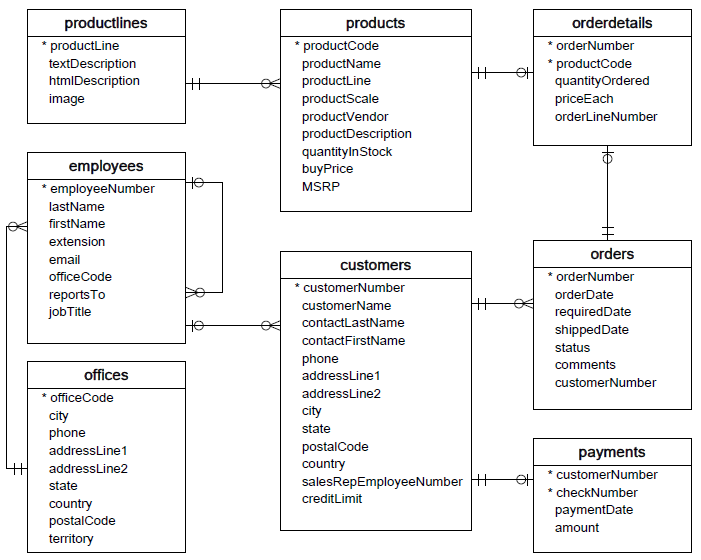


*   Customers: stores customer’s data.
*   Products: stores a list of scale model cars.
*   ProductLines: stores a list of product line categories.
*   Orders: stores sales orders placed by customers.
*   OrderDetails: stores sales order line items for each sales order.
*   Payments: stores payments made by customers based on their accounts.
*   Employees: stores all employee information as well as the organization structure such as who reports to whom.
*   Offices: stores sales office data.




#2.구매 지표 추출 (사전녹화)

## 1)매출액(일자별, 월별, 연도별)

*   일별 매출액을 조회하려면 주문의 주문일과 판매액을 사용함
*   ERD를 보면 주문 일자(orderdate)는 orders 테이블에 존재하고, 판매액(priceEach * quantityOrdered)은 orderdetails에 존재함
*   orders 테이블의 주문 정보에 orderdetails의 주문 상품 가격을 결합함





### a) 일별 매출액 조회



*   2개의 테이블(orders, orderdetails)을 조합한 뒤, ORDERDATE와 PRICEEACH x QUANTITYORDERED(매출액)를 조회한 결과



In [22]:
sql = f"""
SELECT A.ORDERDATE
     , PRICEEACH*QUANTITYORDERED
  FROM ORDERS A
  LEFT JOIN ORDERDETAILS B
    ON A.ORDERNUMBER = B.ORDERNUMBER
"""
sql_result(sql,'2_1_A_1일별매출액조회')


SELECT A.ORDERDATE
     , PRICEEACH*QUANTITYORDERED
  FROM ORDERS A
  LEFT JOIN ORDERDETAILS B
    ON A.ORDERNUMBER = B.ORDERNUMBER

    orderDate  PRICEEACH*QUANTITYORDERED
0  2003-01-06                    4080.00
1  2003-01-06                    2754.50
2  2003-01-06                    1660.12
3  2003-01-06                    1729.21
4  2003-01-09                    2701.50
5  2003-01-09                    4343.56
6  2003-01-09                    1463.85
7  2003-01-09                    2040.10
8  2003-01-10                    3726.45
9  2003-01-10                    1768.33
./result/5w/2_1_A_1일별매출액조회.csv


*   ORDERDATE로 그룹핑한 뒤, PRICEEACH x QUANTITYORDERED(매출액)의 합을 집계하면 일별 매출액을 계산

In [23]:
# GROUP BY 1, ORDER BY 1은 이름에 관계 없이 첫 번째 열로 그룹화
sql = f"""
SELECT A.ORDERDATE
     , SUM(PRICEEACH*QUANTITYORDERED) AS SALES
  FROM ORDERS A
  LEFT JOIN ORDERDETAILS B
    ON A.ORDERNUMBER = B.ORDERNUMBER
 GROUP BY 1
 ORDER BY 1;
"""
sql_result(sql,'2_1_A_2일별매출액조회')


SELECT A.ORDERDATE
     , SUM(PRICEEACH*QUANTITYORDERED) AS SALES
  FROM ORDERS A
  LEFT JOIN ORDERDETAILS B
    ON A.ORDERNUMBER = B.ORDERNUMBER
 GROUP BY 1
 ORDER BY 1;

    orderDate     SALES
0  2003-01-06  10223.83
1  2003-01-09  10549.01
2  2003-01-10   5494.78
3  2003-01-29  50218.95
4  2003-01-31  40206.20
5  2003-02-11  53959.21
6  2003-02-17  52151.81
7  2003-02-24  22292.62
8  2003-03-03  51001.22
9  2003-03-10  25833.14
./result/5w/2_1_A_2일별매출액조회.csv


### b) 월별 매출액 조회

*   판매일(orderdate)은 'yyyy-mm-dd'의 형태로 구성됨
*   orderdate에서 'yyyy-mm'만 가져올 수 있다면, 월별 매출액을 조회할 수 있음
*   문자열에서 원하는 텍스트만 호출하는 함수는 substr()

**문자열에서 원하는 부분만 가져오기 substr()**
<br>substr(칼럼, 위치, 길이)
<br>칼럼 : 문자열
<br>위치 : 시작 텍스트의 위치를 나타냄
<br>길이 : 몇 개의 텍스트를 가지고 올지 정함

In [24]:
#substr 명령어
sql = f"""
SELECT SUBSTR('ABCDE',2,3);
"""
df = pd.read_sql(sql, conn, index_col=None)
df.head()

,"SUBSTR('ABCDE',2,3)"
0,BCD


*   substr()을 이용해 월별 매출을 구하는 방법

In [25]:
# ORDERDATE에서 1번째부터 7번째까지의 값을 month로 (2021-10)
sql = f"""
SELECT SUBSTR(A.ORDERDATE,1,7) AS MONTH
     , SUM(PRICEEACH*QUANTITYORDERED) AS SALES
  FROM ORDERS A
  LEFT JOIN ORDERDETAILS B
  ON A.ORDERNUMBER = B.ORDERNUMBER
 GROUP BY 1
 ORDER BY 1;
"""
sql_result(sql,'2_1_B월별매출')


SELECT SUBSTR(A.ORDERDATE,1,7) AS MONTH
     , SUM(PRICEEACH*QUANTITYORDERED) AS SALES
  FROM ORDERS A
  LEFT JOIN ORDERDETAILS B
  ON A.ORDERNUMBER = B.ORDERNUMBER
 GROUP BY 1
 ORDER BY 1;

     MONTH      SALES
0  2003-01  116692.77
1  2003-02  128403.64
2  2003-03  160517.14
3  2003-04  185848.59
4  2003-05  179435.55
5  2003-06  150470.77
6  2003-07  201940.36
7  2003-08  178257.11
8  2003-09  236697.85
9  2003-10  514336.21
./result/5w/2_1_B월별매출.csv


### c) 연도별 매출액 조회

*   연도별 매출액은 월별 매출액과 동일한 방법으로 산출함

In [26]:
# SUBSTR(A.ORDERDATE, 1, 4)로 2021별로 조회 진행
sql = f"""
SELECT SUBSTR(A.ORDERDATE,1,4) AS YEAR
     , SUM(PRICEEACH*QUANTITYORDERED) AS SALES
  FROM ORDERS A
  LEFT JOIN ORDERDETAILS B 
    ON A.ORDERNUMBER = B.ORDERNUMBER
 GROUP BY 1
 ORDER BY 1;
"""
sql_result(sql,'2_1_C연도별매출')


SELECT SUBSTR(A.ORDERDATE,1,4) AS YEAR
     , SUM(PRICEEACH*QUANTITYORDERED) AS SALES
  FROM ORDERS A
  LEFT JOIN ORDERDETAILS B 
    ON A.ORDERNUMBER = B.ORDERNUMBER
 GROUP BY 1
 ORDER BY 1;

   YEAR       SALES
0  2003  3317348.39
1  2004  4515905.51
2  2005  1770936.71
./result/5w/2_1_C연도별매출.csv


## 2) 구매자 수, 구매 건수(일자별, 월별, 연도별)

*   일자별, 월별, 연도별 구매자 수를 추출함
*   ERD를 살펴보면 ORDERS테이블에 판매일(ORDERDATR), 구매 고객 번호(CUSTOMERNUMBER)가 존재함
*   판매일(ORDERDATE)로 그룹핑한 후 고객 번호를 COUNT해야 함
*   구매자 수, 구매 건수를 산출할 때 보통 UNIQUE하게 필드를 COUNT해 줘야 함

In [27]:
#CUSTOMERNUMBER 중복이 존재함
sql = f"""
SELECT ORDERDATE
     , CUSTOMERNUMBER
     , ORDERNUMBER
  FROM ORDERS;
"""
sql_result(sql,'2_2_1구매자수구매건수')


SELECT ORDERDATE
     , CUSTOMERNUMBER
     , ORDERNUMBER
  FROM ORDERS;

    orderDate  customerNumber  orderNumber
0  2003-01-06             363        10100
1  2003-01-09             128        10101
2  2003-01-10             181        10102
3  2003-01-29             121        10103
4  2003-01-31             141        10104
5  2003-02-11             145        10105
6  2003-02-17             278        10106
7  2003-02-24             131        10107
8  2003-03-03             385        10108
9  2003-03-10             486        10109
./result/5w/2_2_1구매자수구매건수.csv


*   주문 번호의 경우 중복이 존재하지 않아 DISTINCT를 사용하지 않아도 됨
*   정확히는 테이블 컬럼 속성을 보고 PK로 중복을 허용하지 않는지 확인함
*   만약 테이블의 구조를 모른다면 아래와 같이 확인해 볼 수 있음

In [28]:
# PK는 Primary Key. 테이블에서 유일한 값.
# 이 과정을 통해 ORDERNUMBER에는 중복되는 값이 없음을 확인할 수 있음.
sql = f"""
SELECT COUNT(ORDERNUMBER) AS N_ORDERS
     , COUNT(DISTINCT ORDERNUMBER) AS N_ORDERS_DISTINCT
  FROM ORDERS;
"""
sql_result(sql,'2_2_2구매자수구매건수')


SELECT COUNT(ORDERNUMBER) AS N_ORDERS
     , COUNT(DISTINCT ORDERNUMBER) AS N_ORDERS_DISTINCT
  FROM ORDERS;

   N_ORDERS  N_ORDERS_DISTINCT
0       326                326
./result/5w/2_2_2구매자수구매건수.csv


*   일별 구매자 수는 UNIQUE 고객수 COUNT와 주문번호 COUNT로 조회함

In [29]:
# 구매자 번호는 중복되는 값 나올 수 있기 때문에 distinct 사용

sql = f"""
SELECT ORDERDATE
     , COUNT(DISTINCT CUSTOMERNUMBER) AS N_PURCHASER
     , COUNT(ORDERNUMBER) AS N_ORDERS
  FROM ORDERS
 GROUP BY 1
 ORDER BY 1;
"""
sql_result(sql,'2_2_3구매자수구매건수')


SELECT ORDERDATE
     , COUNT(DISTINCT CUSTOMERNUMBER) AS N_PURCHASER
     , COUNT(ORDERNUMBER) AS N_ORDERS
  FROM ORDERS
 GROUP BY 1
 ORDER BY 1;

    orderDate  N_PURCHASER  N_ORDERS
0  2003-01-06            1         1
1  2003-01-09            1         1
2  2003-01-10            1         1
3  2003-01-29            1         1
4  2003-01-31            1         1
5  2003-02-11            1         1
6  2003-02-17            1         1
7  2003-02-24            1         1
8  2003-03-03            1         1
9  2003-03-10            1         1
./result/5w/2_2_3구매자수구매건수.csv


**QUIZ? 월별 구매자수 산출, 연도별 구매자수 산출**

In [30]:
sql = f"""
    SELECT SUBSTR(ORDERDATE, 1, 7) AS MONTH,
    COUNT(DISTINCT CUSTOMERNUMBER) AS N_CUST
    FROM ORDERS
    GROUP BY 1
    ORDER BY 1;
"""
sql_result(sql,'2_2_4월별구매자수')


    SELECT SUBSTR(ORDERDATE, 1, 7) AS MONTH,
    COUNT(DISTINCT CUSTOMERNUMBER) AS N_CUST
    FROM ORDERS
    GROUP BY 1
    ORDER BY 1;

     MONTH  N_CUST
0  2003-01       5
1  2003-02       3
2  2003-03       6
3  2003-04       7
4  2003-05       6
5  2003-06       6
6  2003-07       7
7  2003-08       5
8  2003-09       8
9  2003-10      17
./result/5w/2_2_4월별구매자수.csv


In [31]:
sql = f"""
    SELECT SUBSTR(ORDERDATE, 1, 4) AS YEAR,
    COUNT(DISTINCT CUSTOMERNUMBER) AS N_CUST
    FROM ORDERS
    GROUP BY 1
    ORDER BY 1;
"""
sql_result(sql,'2_2_4연도별구매건수')


    SELECT SUBSTR(ORDERDATE, 1, 4) AS YEAR,
    COUNT(DISTINCT CUSTOMERNUMBER) AS N_CUST
    FROM ORDERS
    GROUP BY 1
    ORDER BY 1;

   YEAR  N_CUST
0  2003      74
1  2004      89
2  2005      44
./result/5w/2_2_4연도별구매건수.csv


## 3) 인당 매출액(연도별)

*   고객의 인당 매출액은 고객의 Loyalty를 측정하는 요인으로 사용될 수 있음
*   기간 별로 평균 인당 고객 매출액을 비교하면, 고객 1명이 우리의 서비스에 얼마를 지불하는 지 그 변화를 파악할 수 있음

일자별 매출액과 구매자 수를 응용한 연도별 인당 매출액 산출
*   STEP1 : 먼저 연도별 매출액과 구매자 수를 산출함

In [32]:
sql = f"""
SELECT SUBSTR(A.ORDERDATE,1,4) AS YEAR
     , COUNT(DISTINCT A.CUSTOMERNUMBER) AS N_PURCHASER
     , SUM(PRICEEACH*QUANTITYORDERED) AS SALES
  FROM ORDERS A
  LEFT JOIN ORDERDETAILS B 
    ON A.ORDERNUMBER = B.ORDERNUMBER
 GROUP BY 1
 ORDER BY 1;
"""
sql_result(sql,'2_3_1인당매출액(연도별)')


SELECT SUBSTR(A.ORDERDATE,1,4) AS YEAR
     , COUNT(DISTINCT A.CUSTOMERNUMBER) AS N_PURCHASER
     , SUM(PRICEEACH*QUANTITYORDERED) AS SALES
  FROM ORDERS A
  LEFT JOIN ORDERDETAILS B 
    ON A.ORDERNUMBER = B.ORDERNUMBER
 GROUP BY 1
 ORDER BY 1;

   YEAR  N_PURCHASER       SALES
0  2003           74  3317348.39
1  2004           89  4515905.51
2  2005           44  1770936.71
./result/5w/2_3_1인당매출액(연도별).csv


*   STEP2 : 매출액을 구매자 수로 나누기
*   SELECT 구문에 SUM(PRICEEACH*QUANTITYORDERED)/ COUNT(DISTINCT A.CUSTOMERNUMBER) 추가함

In [33]:
sql = f"""
SELECT SUBSTR(A.ORDERDATE,1,4) AS YEAR
     , COUNT(DISTINCT A.CUSTOMERNUMBER) AS N_PURCHASER
     , SUM(PRICEEACH*QUANTITYORDERED) AS SALES
     -- 매출액을 구매자 수로 나누기 추가
     , SUM(PRICEEACH*QUANTITYORDERED)/ COUNT(DISTINCT A.CUSTOMERNUMBER) AS AMV
  FROM ORDERS A
  LEFT JOIN ORDERDETAILS B
    ON A.ORDERNUMBER = B.ORDERNUMBER
 GROUP BY 1
 ORDER BY 1;
"""
sql_result(sql,'2_3_2인당매출액(연도별)')


SELECT SUBSTR(A.ORDERDATE,1,4) AS YEAR
     , COUNT(DISTINCT A.CUSTOMERNUMBER) AS N_PURCHASER
     , SUM(PRICEEACH*QUANTITYORDERED) AS SALES
     -- 매출액을 구매자 수로 나누기 추가
     , SUM(PRICEEACH*QUANTITYORDERED)/ COUNT(DISTINCT A.CUSTOMERNUMBER) AS AMV
  FROM ORDERS A
  LEFT JOIN ORDERDETAILS B
    ON A.ORDERNUMBER = B.ORDERNUMBER
 GROUP BY 1
 ORDER BY 1;

   YEAR  N_PURCHASER       SALES           AMV
0  2003           74  3317348.39  44829.032297
1  2004           89  4515905.51  50740.511348
2  2005           44  1770936.71  40248.561591
./result/5w/2_3_2인당매출액(연도별).csv


## 4) 건당 구매 금액(ATV)(연도별)

*   ATV(Average Transaction Value) : 1건의 거래가 평균적으로 발생시키는 매출
*   인당 구매 금액 (AMV)을 구하는 방법과 유사함
*   매출을 구매자 수가 아닌 구매 건수로 나누면 건당 금액을 산출함

In [34]:
# 위랑 다른 점은 그냥 어떤 값으로 나눴냐. 이 차이임
sql = f"""
SELECT SUBSTR(A.ORDERDATE,1,4) AS YEAR
     , COUNT(DISTINCT A.ORDERNUMBER) AS N_ORDERS
     , SUM(PRICEEACH*QUANTITYORDERED) AS SALES
     -- 매출액을 구매 건수로 나누기 추가
     , SUM(PRICEEACH*QUANTITYORDERED)/ COUNT(DISTINCT A.ORDERNUMBER) AS ATV
  FROM ORDERS A
  LEFT JOIN ORDERDETAILS B ON A.ORDERNUMBER = B.ORDERNUMBER
 GROUP BY 1
 ORDER BY 1;
"""
sql_result(sql,'2_4_1건당구매금액(ATV)')


SELECT SUBSTR(A.ORDERDATE,1,4) AS YEAR
     , COUNT(DISTINCT A.ORDERNUMBER) AS N_ORDERS
     , SUM(PRICEEACH*QUANTITYORDERED) AS SALES
     -- 매출액을 구매 건수로 나누기 추가
     , SUM(PRICEEACH*QUANTITYORDERED)/ COUNT(DISTINCT A.ORDERNUMBER) AS ATV
  FROM ORDERS A
  LEFT JOIN ORDERDETAILS B ON A.ORDERNUMBER = B.ORDERNUMBER
 GROUP BY 1
 ORDER BY 1;

   YEAR  N_ORDERS       SALES           ATV
0  2003       111  3317348.39  29886.021532
1  2004       151  4515905.51  29906.659007
2  2005        64  1770936.71  27670.886094
./result/5w/2_4_1건당구매금액(ATV).csv


# 3.그룹별 구매 지표 구하기 (사전녹화)

*   국가별 도시별로 매출 지표를 계산해 더 상세하게 비즈니스를 이해함

## 1) 국가별, 도시별 매출액

*   해당 주문 건이 발생한 국가, 도시를 파악하기 위해서 CUSTOMERS 테이블의 COUNTRY를 이용함
*   ORDERS, CUSTOMERS, ORDERDETAILS를 모두 사용해야 국가별, 도시별 매출액 산출 가능함

*   STEP1 : ORDERS, CUSTOMERS, ORDERDETAILS 3가지 테이블을 결합함
*   각 테이블을 연결하는 필드는 ORDERNUMBER, CUSTOMERNUMBER

In [35]:
# A는 ORDERS, B는 CUSTOMERS, C는 ORDERDETAILS의 테이블임.
sql = f"""
SELECT *
  FROM ORDERS A
  LEFT JOIN ORDERDETAILS B 
    ON A.ORDERNUMBER = B.ORDERNUMBER
  LEFT JOIN CUSTOMERS C
    ON A.CUSTOMERNUMBER = C.CUSTOMERNUMBER;
"""
sql_result(sql,'3_1_1국가별도시별매출액')


SELECT *
  FROM ORDERS A
  LEFT JOIN ORDERDETAILS B 
    ON A.ORDERNUMBER = B.ORDERNUMBER
  LEFT JOIN CUSTOMERS C
    ON A.CUSTOMERNUMBER = C.CUSTOMERNUMBER;

   orderNumber   orderDate  ... salesRepEmployeeNumber creditLimit
0        10100  2003-01-06  ...                   1216      114200
1        10100  2003-01-06  ...                   1216      114200
2        10100  2003-01-06  ...                   1216      114200
3        10100  2003-01-06  ...                   1216      114200
4        10101  2003-01-09  ...                   1504       59700
5        10101  2003-01-09  ...                   1504       59700
6        10101  2003-01-09  ...                   1504       59700
7        10101  2003-01-09  ...                   1504       59700
8        10102  2003-01-10  ...                   1286       76400
9        10102  2003-01-10  ...                   1286       76400

[10 rows x 25 columns]
./result/5w/3_1_1국가별도시별매출액.csv


*   STEP2 : 3개의 테이블을 조합한 뒤 COUNTRY, CITY, PRICEEACH*QUANTITYORDERED을 조회함

In [36]:
sql = f"""
SELECT COUNTRY
     , CITY
     , PRICEEACH*QUANTITYORDERED
  FROM ORDERS A
  LEFT JOIN ORDERDETAILS B
    ON A.ORDERNUMBER = B.ORDERNUMBER
  LEFT JOIN CUSTOMERS C
    ON A.CUSTOMERNUMBER = C.CUSTOMERNUMBER;
"""
sql_result(sql,'3_1_2국가별도시별매출액')


SELECT COUNTRY
     , CITY
     , PRICEEACH*QUANTITYORDERED
  FROM ORDERS A
  LEFT JOIN ORDERDETAILS B
    ON A.ORDERNUMBER = B.ORDERNUMBER
  LEFT JOIN CUSTOMERS C
    ON A.CUSTOMERNUMBER = C.CUSTOMERNUMBER;

   country       city  PRICEEACH*QUANTITYORDERED
0      USA     Nashua                    4080.00
1      USA     Nashua                    2754.50
2      USA     Nashua                    1660.12
3      USA     Nashua                    1729.21
4  Germany  Frankfurt                    2701.50
5  Germany  Frankfurt                    4343.56
6  Germany  Frankfurt                    1463.85
7  Germany  Frankfurt                    2040.10
8      USA        NYC                    3726.45
9      USA        NYC                    1768.33
./result/5w/3_1_2국가별도시별매출액.csv


*   STEP3-1 : CUSTOMERS 테이블에서 국가(COUNTRY), 도시(CITY)를 불러오고, 2가지 칼럼으로 그룹핑함
*   STEP3-2 : 이후 ORDERDETAILS 테이블의 PRICEEACH*QUANTITYORDERED를 합해 국가별, 도시별 매출액을 산출함

In [37]:
# 여기서 두 가지 칼럼으로 그룹핑해서 GROUP BY 1, 2인가봐
sql = f"""
SELECT C.COUNTRY
     , C.CITY
     , SUM(PRICEEACH*QUANTITYORDERED) SALES
  FROM ORDERS A
  LEFT JOIN ORDERDETAILS B
    ON A.ORDERNUMBER = B.ORDERNUMBER
  LEFT JOIN CUSTOMERS C
    ON A.CUSTOMERNUMBER = C.CUSTOMERNUMBER
 GROUP BY 1,2;
"""
sql_result(sql,'3_1_3국가별도시별매출액')


SELECT C.COUNTRY
     , C.CITY
     , SUM(PRICEEACH*QUANTITYORDERED) SALES
  FROM ORDERS A
  LEFT JOIN ORDERDETAILS B
    ON A.ORDERNUMBER = B.ORDERNUMBER
  LEFT JOIN CUSTOMERS C
    ON A.CUSTOMERNUMBER = C.CUSTOMERNUMBER
 GROUP BY 1,2;

     country            city      SALES
0  Australia       Chatswood  133907.12
1  Australia    Glen Waverly   55866.02
2  Australia       Melbourne  180585.07
3  Australia    North Sydney  137034.22
4  Australia  South Brisbane   55190.16
5    Austria            Graz   51059.99
6    Austria        Salzburg  137480.07
7    Belgium       Bruxelles   70851.58
8    Belgium       Charleroi   29217.18
9     Canada        Montréal   68977.67
./result/5w/3_1_3국가별도시별매출액.csv


*   STEP4: COUNTRY, CITY로 데이터를 정렬하면 데이터를 가독성 있게 구조화할 수 있음

In [38]:
# ORDER BY 1, 2는 1열과 2열로 데이터 정렬해라.
sql = f"""
SELECT C.COUNTRY
     , C.CITY
     , SUM(PRICEEACH*QUANTITYORDERED) AS SALES
  FROM ORDERS A

  LEFT JOIN ORDERDETAILS B
    ON A.ORDERNUMBER = B.ORDERNUMBER

  LEFT JOIN CUSTOMERS C
    ON A.CUSTOMERNUMBER = C.CUSTOMERNUMBER
    
 GROUP BY 1,2
 ORDER BY 1,2;
"""
sql_result(sql,'3_1_3국가별도시별매출액')


SELECT C.COUNTRY
     , C.CITY
     , SUM(PRICEEACH*QUANTITYORDERED) AS SALES
  FROM ORDERS A

  LEFT JOIN ORDERDETAILS B
    ON A.ORDERNUMBER = B.ORDERNUMBER

  LEFT JOIN CUSTOMERS C
    ON A.CUSTOMERNUMBER = C.CUSTOMERNUMBER
    
 GROUP BY 1,2
 ORDER BY 1,2;

     country            city      SALES
0  Australia       Chatswood  133907.12
1  Australia    Glen Waverly   55866.02
2  Australia       Melbourne  180585.07
3  Australia    North Sydney  137034.22
4  Australia  South Brisbane   55190.16
5    Austria            Graz   51059.99
6    Austria        Salzburg  137480.07
7    Belgium       Bruxelles   70851.58
8    Belgium       Charleroi   29217.18
9     Canada        Montréal   68977.67
./result/5w/3_1_3국가별도시별매출액.csv


## 2) 북미(USA, Canada) VS 비북미 매출액 비교

도시가 아닌 북미와 비북미 지역 2가지로 구분해 매출을 조회함

**CASE WHEN 구문**
*   CASE WHEN은 조건에 따라 원하는 결과를 출력하는 구문
*   CASE WHEN을 이용해 북미와 비북미 지역으로 구분할 수 있음

**CASE WHEN 조건 THEN 결과 END**
*   북미(USA, Canada)와 비북미를 구분하는 CASE WHEN 구문

In [39]:
#case when 구문
# END는 조건문이 끝났다는 뜻.
sql = f"""
SELECT CASE WHEN COUNTRY IN ('USA','Canada') THEN 'North America'
            ELSE 'Others'
        END AS COUNTRY_GRP
  FROM CUSTOMERS;
"""
sql_result(sql,'3_2_1북미비북미매출액비교')


SELECT CASE WHEN COUNTRY IN ('USA','Canada') THEN 'North America'
            ELSE 'Others'
        END AS COUNTRY_GRP
  FROM CUSTOMERS;

     COUNTRY_GRP
0         Others
1  North America
2         Others
3         Others
4         Others
5  North America
6         Others
7         Others
8  North America
9  North America
./result/5w/3_2_1북미비북미매출액비교.csv


**국가별 도시별 매출액**
*   국가별 도시별 매출액을 구하는 쿼리에 case when 구문을 응용하면 북미, 비북미 매출액을 구할 수 있음

In [40]:
# 기존 국가별 도시별 매출액
sql = f"""
SELECT C.COUNTRY  --국가별
     , C.CITY  --도시별
     , SUM(PRICEEACH*QUANTITYORDERED) AS SALES
  FROM ORDERS A
  LEFT JOIN ORDERDETAILS B
    ON A.ORDERNUMBER = B.ORDERNUMBER
  LEFT JOIN CUSTOMERS C
    ON A.CUSTOMERNUMBER = C.CUSTOMERNUMBER
 GROUP BY 1,2
 ORDER BY 3 DESC
;
"""
sql_result(sql,'3_2_2북미비북미매출액비교')


SELECT C.COUNTRY  --국가별
     , C.CITY  --도시별
     , SUM(PRICEEACH*QUANTITYORDERED) AS SALES
  FROM ORDERS A
  LEFT JOIN ORDERDETAILS B
    ON A.ORDERNUMBER = B.ORDERNUMBER
  LEFT JOIN CUSTOMERS C
    ON A.CUSTOMERNUMBER = C.CUSTOMERNUMBER
 GROUP BY 1,2
 ORDER BY 3 DESC
;

       country           city      SALES
0        Spain         Madrid  979880.77
1          USA     San Rafael  591827.34
2          USA            NYC  497941.50
3  New Zealand     Auckland    292082.87
4    Singapore      Singapore  263997.78
5       France          Paris  240649.68
6          USA  San Francisco  199051.34
7          USA    New Bedford  190500.01
8       France         Nantes  180887.48
9    Australia      Melbourne  180585.07
./result/5w/3_2_2북미비북미매출액비교.csv


*   위 쿼리에서 COUNTRY와 CITY를 CASE WHEN 구문으로 변경하면 북미, 비북미의 매출을 구분해 조회할 수 있음

**북미, 비북미 매출액**

In [41]:
# 북미, 비북미 매출액
# 여기서는 C.COUNTRY 말고 그냥 COUNTRY를 사용했음
sql = f"""
SELECT CASE WHEN COUNTRY IN ('USA','Canada') THEN 'North America'
            ELSE 'Others'
        END COUNTRY_GRP -- 북미, 비북미
     , SUM(PRICEEACH*QUANTITYORDERED) AS SALES
  FROM ORDERS A
  LEFT JOIN ORDERDETAILS B
    ON A.ORDERNUMBER = B.ORDERNUMBER
  LEFT JOIN CUSTOMERS C
    ON A.CUSTOMERNUMBER = C.CUSTOMERNUMBER
 GROUP BY 1
 ORDER BY 2 DESC
;
"""
sql_result(sql,'3_2_3북미비북미매출액비교')


SELECT CASE WHEN COUNTRY IN ('USA','Canada') THEN 'North America'
            ELSE 'Others'
        END COUNTRY_GRP -- 북미, 비북미
     , SUM(PRICEEACH*QUANTITYORDERED) AS SALES
  FROM ORDERS A
  LEFT JOIN ORDERDETAILS B
    ON A.ORDERNUMBER = B.ORDERNUMBER
  LEFT JOIN CUSTOMERS C
    ON A.CUSTOMERNUMBER = C.CUSTOMERNUMBER
 GROUP BY 1
 ORDER BY 2 DESC
;

     COUNTRY_GRP       SALES
0         Others  6124998.70
1  North America  3479191.91
./result/5w/3_2_3북미비북미매출액비교.csv


## 3) 매출 Top5 국가 및 매출

*   그룹별로 집계한 데이터를 이용해 매출 상위 국가를 출력함

* STEP : 국가별 매출을 모두 출력한 후 매출이 높은 순위부터 등수를 매겨 상위 5개의 국가만 출력함
*   데이터의 값에 따라 등수를 매기는 함수 **row_number, rank**

[테이블 생성 방식]
*   국가별 매출액을 다른 이름의 테이블로 생성한 후, 매출에 따라 RANK를 매기면 우리가 원하는 Top5 국가를 산출할 수 있음

In [42]:
#만약 STAT테이블이 존재하는 경우 삭제
sql = f"""
DROP TABLE IF EXISTS STAT;
"""
conn.execute(sql)

In [43]:
#테이블 리스트 조회
sql = f"""
SELECT name
  FROM sqlite_master
 WHERE type='table';
"""
df = pd.read_sql(sql, conn, index_col=None)
df.head(100)

,name
0,customers
1,employees
2,offices
3,orderdetails
4,orders
5,payments
6,productlines
7,products


*   STEP1: STAT(국가별 매출액) 테이블 생성

In [44]:
sql = f"""
CREATE TABLE STAT AS
SELECT C.COUNTRY
     , SUM(PRICEEACH*QUANTITYORDERED) AS SALES
  FROM ORDERS A
  LEFT JOIN ORDERDETAILS B
    ON A.ORDERNUMBER = B.ORDERNUMBER
  LEFT JOIN CUSTOMERS C
    ON A.CUSTOMERNUMBER = C.CUSTOMERNUMBER
 GROUP BY 1
 ORDER BY 2 DESC
;
"""
conn.execute(sql)

*   테이블 리스트 조회

In [45]:
#테이블 리스트 조회
sql = f"""
SELECT name
  FROM sqlite_master
 WHERE type='table';
"""
df = pd.read_sql(sql, conn, index_col=None)
df.head(100)

,name
0,customers
1,employees
2,offices
3,orderdetails
4,orders
5,payments
6,productlines
7,products
8,STAT


*   STAT테이블 조회 결과

In [46]:
sql = f"""
SELECT *
  FROM STAT;
"""
sql_result(sql,'3_3_2매출TOP5국가및매출')


SELECT *
  FROM STAT;

       country       SALES
0          USA  3273280.05
1        Spain  1099389.09
2       France  1007374.02
3    Australia   562582.59
4  New Zealand   476847.01
5           UK   436947.44
6        Italy   360616.81
7      Finland   295149.35
8    Singapore   263997.78
9      Denmark   218994.92
./result/5w/3_3_2매출TOP5국가및매출.csv


*   STAT 테이블에서 RANK를 이용해 매출액 등수 부여함

In [47]:
!pip install mysql

     |████████████████████████████████| 88 kB 3.8 MB/s 
  Created wheel for mysqlclient: filename=mysqlclient-2.0.3-cp37-cp37m-linux_x86_64.whl size=100151 sha256=354753aa203191bc31992086ad4b59082f4695f29111a6ed2158b52c37e859ea
  Stored in directory: /root/.cache/pip/wheels/79/1c/f8/11fafab45fe6696eea63794a5d747b9c6b54990ac6f1885fb7
Successfully built mysqlclient


In [48]:
sql = f"""
SELECT COUNTRY
    , SALES
    , RANK() OVER (ORDER BY SALES DESC) AS RNK
    FROM STAT;
"""
sql_result(sql, '3_3_3매출TOP5국가및매출')


SELECT COUNTRY
    , SALES
    , RANK() OVER (ORDER BY SALES DESC) AS RNK
    FROM STAT;



DatabaseError: ignored

*   STEP2: 등수를 부여한 결과를 다시 STAT_RNK 테이블로 생성함

In [49]:
#만약 STAT_RNK 테이블이 존재하는 경우 삭제
sql = f"""
DROP TABLE IF EXISTS STAT_RNK;
"""
conn.execute(sql)

*   STAT_RNK(국가, 매출액, 순위) 테이블 생성

In [ ]:
#STAT_RNK 테이블 생성
sql = f"""
CREATE TABLE STAT_RNK AS
SELECT COUNTRY
     , SALES
     , RANK() OVER (ORDER BY SALES DESC) AS RNK
  FROM STAT;
"""
conn.execute(sql)

*   STAT_RNK 테이블 조회 결과

In [50]:
#STAT_RNK 테이블 조회
sql = f"""
SELECT *
  FROM STAT_RNK;
"""
sql_result(sql,'3_3_4매출TOP5국가및매출')


SELECT *
  FROM STAT_RNK;



DatabaseError: ignored

*   STEP3: 상위 5개 국가를 추출하기 위한 쿼리

In [51]:
sql = f"""
SELECT *
  FROM STAT_RNK
 WHERE RNK BETWEEN 1 AND 5;
"""
sql_result(sql,'3_3_5매출TOP5국가및매출')


SELECT *
  FROM STAT_RNK
 WHERE RNK BETWEEN 1 AND 5;



DatabaseError: ignored

[테이블 생성 방식]
*   원하는 결과를 출력했지만, 2개의 테이블을 생성해 원하는 결과를 출력함
*   데이터를 조회할 때마다 이렇게 테이블을 생성한다면, DB 관리 어려움

**SUBQUERY**
*   서브 쿼리를 이용하면 여러 개의 테이블을 만들지 않고도 원하는 결과를 조회할 수 있음

In [ ]:
sql = f"""
SELECT *

--STAT_RNK 테이블
  FROM (
SELECT COUNTRY
     , SALES
     , RANK() OVER (ORDER BY SALES DESC) AS RNK

--RNK 테이블
  FROM (
SELECT C.COUNTRY
     , SUM(PRICEEACH*QUANTITYORDERED) AS SALES
  FROM ORDERS A

  LEFT JOIN ORDERDETAILS B
    ON A.ORDERNUMBER = B.ORDERNUMBER

  LEFT JOIN CUSTOMERS C
    ON A.CUSTOMERNUMBER = C.CUSTOMERNUMBER
    
 GROUP BY 1
     ) RNK

     ) STAT_RNK
 WHERE RNK <= 5
;
"""
sql_result(sql,'3_3_6매출TOP5국가및매출')

#4.재구매율 (실시간)

*   재구매율: 특정 기간1(ex. 2018년) 구매자 중 특정 기간 2(ex. 2019년)에 연달아 구매한 구매자의 비중을 의미함

*   재구매율을 만들기 위해 orders & orders 테이블 JOIN

[Orders 테이블 결합조건]
*   ORDERS 테이블을 결합하는 데 CUSTOMERNUMBER와 ODERDATE로 데이터를 결합함 
*   ORDER(A)의 SUBSTR(A.ODERDATE,1,4)+0와 B의 SUBSTR(B.ORDERDATE,1,4)-1을 결합함

[Orders 테이블 매칭결과]
*   ORDER(A)의 CUSTOMER A의 2003년도 거래 건에는 2004년도 거래가 매칭됨
*   2004년 거래 건에는 2005년 거래가 없어 어떤 값도 매칭되지 않음

[재구매율 계산]
*   A의 주문 연도로 그룹핑 후 A의 CUSTOMERNUMBER를 COUNT하면 해당 연도의 구매자 수가 계산됨
*   B의 CUSTOMERNUMBER를 COUNT하면 이후 연도 구매자 수가 계산됨
*   두 값을 나누면 최종적으로 각 연도의 Retention Rate(%)를 구할 수 있음

In [52]:
sql = f"""

SELECT A.CUSTOMERNUMBER
     , A.ORDERDATE
     , B.CUSTOMERNUMBER AS CUSTOMERNUMBER_RE
     , B.ORDERDATE AS ORDERDATE_RE
  FROM ORDERS A
  LEFT JOIN ORDERS B
    ON A.CUSTOMERNUMBER = B.CUSTOMERNUMBER
   AND SUBSTR(A.ORDERDATE,1,4)+0 = SUBSTR(B.ORDERDATE,1,4)-1
 ;
"""
sql_result(sql,'4_0재구매율')



SELECT A.CUSTOMERNUMBER
     , A.ORDERDATE
     , B.CUSTOMERNUMBER AS CUSTOMERNUMBER_RE
     , B.ORDERDATE AS ORDERDATE_RE
  FROM ORDERS A
  LEFT JOIN ORDERS B
    ON A.CUSTOMERNUMBER = B.CUSTOMERNUMBER
   AND SUBSTR(A.ORDERDATE,1,4)+0 = SUBSTR(B.ORDERDATE,1,4)-1
 ;

   customerNumber   orderDate  CUSTOMERNUMBER_RE ORDERDATE_RE
0             363  2003-01-06              363.0   2004-11-04
1             128  2003-01-09              128.0   2004-03-15
2             128  2003-01-09              128.0   2004-11-05
3             181  2003-01-10              181.0   2004-04-05
4             181  2003-01-10              181.0   2004-11-05
5             121  2003-01-29              121.0   2004-10-15
6             121  2003-01-29              121.0   2004-11-05
7             141  2003-01-31              141.0   2004-01-16
8             141  2003-01-31              141.0   2004-04-29
9             141  2003-01-31              141.0   2004-05-05
./result/5w/4_0재구매율.csv


## 1) 국가별 2004, 2005 Retention Rate(%)

국가별 Retention Rate(%) 산출 방법

*   국가별 Retention Rate(%) : A 국가 거주 구매자 중 다음 연도에도 구매를 한 구매자의 비중으로 정의함
*   재구매율 계산 쿼리에 "고객의 거주 국가 정보"를 결합한 후 거주 국가로 그룹핑해 산출함

In [53]:
sql = f"""
SELECT C.COUNTRY --국가정보
     , SUBSTR(A.ORDERDATE,1,4) AS YEAR
     , COUNT(DISTINCT A.CUSTOMERNUMBER) AS BU_1
     , COUNT(DISTINCT B.CUSTOMERNUMBER) AS BU_2
     , (COUNT(DISTINCT B.CUSTOMERNUMBER) + 0.0)/(COUNT(DISTINCT A.CUSTOMERNUMBER) + 0.0) AS RETENTION_RATE --소수점 변환 위해 0.0 붙임

  FROM ORDERS A

  LEFT JOIN ORDERS B
    ON A.CUSTOMERNUMBER = B.CUSTOMERNUMBER
   AND SUBSTR(A.ORDERDATE,1,4)+0 = SUBSTR(B.ORDERDATE,1,4)-1

  LEFT JOIN CUSTOMERS C -- 거주정보
    ON A.CUSTOMERNUMBER = C.CUSTOMERNUMBER
 GROUP BY 1,2
;
"""
sql_result(sql,'4_1국가별RetentionRate')


SELECT C.COUNTRY --국가정보
     , SUBSTR(A.ORDERDATE,1,4) AS YEAR
     , COUNT(DISTINCT A.CUSTOMERNUMBER) AS BU_1
     , COUNT(DISTINCT B.CUSTOMERNUMBER) AS BU_2
     , (COUNT(DISTINCT B.CUSTOMERNUMBER) + 0.0)/(COUNT(DISTINCT A.CUSTOMERNUMBER) + 0.0) AS RETENTION_RATE --소수점 변환 위해 0.0 붙임

  FROM ORDERS A

  LEFT JOIN ORDERS B
    ON A.CUSTOMERNUMBER = B.CUSTOMERNUMBER
   AND SUBSTR(A.ORDERDATE,1,4)+0 = SUBSTR(B.ORDERDATE,1,4)-1

  LEFT JOIN CUSTOMERS C -- 거주정보
    ON A.CUSTOMERNUMBER = C.CUSTOMERNUMBER
 GROUP BY 1,2
;

     country  YEAR  BU_1  BU_2  RETENTION_RATE
0  Australia  2003     5     3        0.600000
1  Australia  2004     3     2        0.666667
2  Australia  2005     4     0        0.000000
3    Austria  2003     2     1        0.500000
4    Austria  2004     1     1        1.000000
5    Austria  2005     2     0        0.000000
6    Belgium  2003     1     1        1.000000
7    Belgium  2004     2     2        1.000000
8    Belgium  2005     2     0        0.000000
9     Ca

# 5.Best Seller (실시간)

미국의 연도별 매출 Top5 차량 모델 추출
<br>4개의 테이블의 데이터를 결합하여 추출함

*   미국 정보 : Customers
*   판매 정보 : Orders
*   매출 정보 : OrderDetails
*   차량 정보 : Products


In [54]:
sql = f"""
DROP TABLE IF EXISTS PRODUCT_SALES;
"""
conn.execute(sql)

In [55]:
sql = f"""
CREATE TABLE PRODUCT_SALES AS
SELECT D.PRODUCTNAME
     , SUM(QUANTITYORDERED*PRICEEACH) AS SALES

  FROM ORDERS A

  LEFT JOIN CUSTOMERS B
    ON A.CUSTOMERNUMBER = B.CUSTOMERNUMBER

  LEFT JOIN ORDERDETAILS C
    ON A.ORDERNUMBER = C.ORDERNUMBER

  LEFT JOIN PRODUCTS D
    ON C.PRODUCTCODE = D.PRODUCTCODE
    
 WHERE B.COUNTRY = 'USA'
 GROUP BY 1
;
"""
conn.execute(sql)

In [56]:
sql = f"""
SELECT A.*
  FROM (
SELECT *
     , ROW_NUMBER() OVER(ORDER BY SALES DESC) RNK
  FROM PRODUCT_SALES
     ) A
 WHERE A.RNK <=5
 ORDER BY A.RNK
;
"""
sql_result(sql,'6_0ChurnRate')


SELECT A.*
  FROM (
SELECT *
     , ROW_NUMBER() OVER(ORDER BY SALES DESC) RNK
  FROM PRODUCT_SALES
     ) A
 WHERE A.RNK <=5
 ORDER BY A.RNK
;



DatabaseError: ignored

# 6.Churn Rate(%) (실시간)

*   Churn Rate: 활동 고객 중 얼마나 많은 고객이 비활동 고객으로 전환되었는지를 의미하는 지표
*   기업들은 광고, 프로모션 등을 통해 신규 고객을 유치하는 데 생각보다 큰  Acquisition Cost을 사용함
*   한 번 획득한 고객을 Active로 유지하는 것은 굉장히 중요함

[Churn Rate정의]
*   Churn Rate를 구하기 전에 Churn에 대한 정의가 필요함
*   Churn: max(구매일, 접속일) 이후 일정 기간(ex.3개월) 구매, 접속하지 않은 상태
*   마지막 구매, 접속일이 현재 시점 기준으로 3개월 이상 지난 고객을 의미함
*   전체 고객 중에 Churn에 해당하는 고객의 비중을 Churn Rate(%)라고 함

## 1)Churn Rate(%) 구하기

*   STEP1 : orders 테이블에서 마지막 구매일을 확인함

In [57]:
sql = f"""
SELECT MAX(ORDERDATE) AS MX_ORDER
  FROM ORDERS;
"""
df = pd.read_sql(sql, conn, index_col=None)
df.head(10)

,MX_ORDER
0,2005-05-31


*   STEP2 : 각 고객의 마지막 구매일이 며칠 소요되었는지 산출함

In [58]:
sql = f"""
SELECT CUSTOMERNUMBER
     , MAX(ORDERDATE) MX_ORDER
  FROM ORDERS
 GROUP BY 1;
"""
sql_result(sql,'6_1_2ChurnRate')


SELECT CUSTOMERNUMBER
     , MAX(ORDERDATE) MX_ORDER
  FROM ORDERS
 GROUP BY 1;

   customerNumber    MX_ORDER
0             103  2004-11-25
1             112  2004-11-29
2             114  2004-11-29
3             119  2005-05-31
4             121  2004-11-05
5             124  2005-05-29
6             128  2004-11-05
7             129  2004-11-18
8             131  2004-11-15
9             141  2005-05-31
./result/5w/6_1_2ChurnRate.csv


*   STEP3 : 2005-06-01 기준으로 며칠이 소요되었는지 계산함
*   날짜 차이 계산은 JulianDay('yyyy-mm-dd') - JulianDay('yyyy-mm-dd') 함수를 사용함

In [59]:
sql = f"""
SELECT CUSTOMERNUMBER
     , '2005-06-01' AS END_POINT
     , MX_ORDER
     , JulianDay('2005-06-01') - JulianDay(MX_ORDER) AS DIFF
  FROM (
SELECT CUSTOMERNUMBER
     , MAX(ORDERDATE) MX_ORDER
  FROM ORDERS
 GROUP BY 1
     ) BASE
;
"""
sql_result(sql,'6_1_3ChurnRate')


SELECT CUSTOMERNUMBER
     , '2005-06-01' AS END_POINT
     , MX_ORDER
     , JulianDay('2005-06-01') - JulianDay(MX_ORDER) AS DIFF
  FROM (
SELECT CUSTOMERNUMBER
     , MAX(ORDERDATE) MX_ORDER
  FROM ORDERS
 GROUP BY 1
     ) BASE
;

   CUSTOMERNUMBER   END_POINT    MX_ORDER   DIFF
0             103  2005-06-01  2004-11-25  188.0
1             112  2005-06-01  2004-11-29  184.0
2             114  2005-06-01  2004-11-29  184.0
3             119  2005-06-01  2005-05-31    1.0
4             121  2005-06-01  2004-11-05  208.0
5             124  2005-06-01  2005-05-29    3.0
6             128  2005-06-01  2004-11-05  208.0
7             129  2005-06-01  2004-11-18  195.0
8             131  2005-06-01  2004-11-15  198.0
9             141  2005-06-01  2005-05-31    1.0
./result/5w/6_1_3ChurnRate.csv


*   DIFF(날짜 차이)는 MX_ORDER와 END_POINT의 차이를 나타냄
*   STEP4 : DIFF가 90일 이상인 경우를 Churn이라 가정함

In [60]:
sql = f"""
SELECT *
     , CASE WHEN DIFF >= 90 THEN 'CHURN' ELSE 'NON-CHURN' END AS CHURN_TYPE
  FROM (
SELECT CUSTOMERNUMBER
     , MX_ORDER
     , '2005-06-01' AS END_POINT
     , JulianDay('2005-06-01') - JulianDay(MX_ORDER) AS DIFF
  FROM (
SELECT CUSTOMERNUMBER
     , MAX(ORDERDATE) AS MX_ORDER
  FROM ORDERS
 GROUP BY 1
     ) BASE
     ) BASE
;
"""
sql_result(sql,'6_1_4ChurnRate')


SELECT *
     , CASE WHEN DIFF >= 90 THEN 'CHURN' ELSE 'NON-CHURN' END AS CHURN_TYPE
  FROM (
SELECT CUSTOMERNUMBER
     , MX_ORDER
     , '2005-06-01' AS END_POINT
     , JulianDay('2005-06-01') - JulianDay(MX_ORDER) AS DIFF
  FROM (
SELECT CUSTOMERNUMBER
     , MAX(ORDERDATE) AS MX_ORDER
  FROM ORDERS
 GROUP BY 1
     ) BASE
     ) BASE
;

   CUSTOMERNUMBER    MX_ORDER   END_POINT   DIFF CHURN_TYPE
0             103  2004-11-25  2005-06-01  188.0      CHURN
1             112  2004-11-29  2005-06-01  184.0      CHURN
2             114  2004-11-29  2005-06-01  184.0      CHURN
3             119  2005-05-31  2005-06-01    1.0  NON-CHURN
4             121  2004-11-05  2005-06-01  208.0      CHURN
5             124  2005-05-29  2005-06-01    3.0  NON-CHURN
6             128  2004-11-05  2005-06-01  208.0      CHURN
7             129  2004-11-18  2005-06-01  195.0      CHURN
8             131  2004-11-15  2005-06-01  198.0      CHURN
9             141  2005-05-31  2005-06-01    1.0  NON-C

*   STEP5 : DIFF가 90이상이면 CHURN, 그렇지 않은 경우는 NON-CHURN으로 구분한 결과를 가지고 CHURN RATE(%)를 산출함

*   Churn Rate(%) : 69/(69+29) = 0.70408163265로, 약 70%로 나타남

In [61]:
sql = f"""
SELECT CASE WHEN DIFF >= 90 THEN 'CHURN' ELSE 'NON-CHURN' END AS CHURN_TYPE
     , COUNT(DISTINCT CUSTOMERNUMBER) AS N_CUS

  FROM (
SELECT CUSTOMERNUMBER
     , MX_ORDER
     , '2005-06-01' AS END_POINT
     , JulianDay('2005-06-01') - JulianDay(MX_ORDER) AS DIFF

  FROM (
SELECT CUSTOMERNUMBER
     , MAX(ORDERDATE) AS MX_ORDER
  FROM ORDERS
 GROUP BY 1
     ) BASE

     ) BASE
 GROUP BY 1
;
"""
df = pd.read_sql(sql, conn, index_col=None)
df.head(10)

,CHURN_TYPE,N_CUS
0,CHURN,69
1,NON-CHURN,29


## 2) Churn 고객이 가장 많이 구매한 Productline

*   Churn 고객의 특성을 파악함
*   Churn 고객은 어떤 카테고리의 상품을 많이 구매했는지 파악함

*   STEP1 : 고객별 Churn Table을 생성함

In [62]:
sql = f"""
DROP TABLE IF EXISTS CHURN_LIST;
"""
conn.execute(sql)

In [63]:
sql = f"""
CREATE TABLE CHURN_LIST AS

SELECT CASE WHEN DIFF >= 90 THEN 'CHURN' ELSE 'NON-CHURN' END CHURN_TYPE
     , CUSTOMERNUMBER

  FROM (
SELECT CUSTOMERNUMBER
     , MX_ORDER
     , '2005-06-01' END_POINT
     , JulianDay('2005-06-01') - JulianDay(MX_ORDER) AS DIFF

  FROM (
SELECT CUSTOMERNUMBER
     , MAX(ORDERDATE) AS MX_ORDER
  FROM ORDERS
 GROUP BY 1
     ) BASE

     ) BASE
;
"""
conn.execute(sql)

*   STEP2 : ②ORDERDETAILS - ORDERS - PRODUCTS를 결합해 ①PRODUCTLINE별 구매자 수 산출함
*   ①PRODUCTLINE별 구매자수는 아래와 같이 산출함



In [64]:
sql = f"""
SELECT C.PRODUCTLINE
     , COUNT(DISTINCT B.CUSTOMERNUMBER) AS BU
  FROM ORDERDETAILS A
  LEFT JOIN ORDERS B
    ON A.ORDERNUMBER = B.ORDERNUMBER
  LEFT JOIN PRODUCTS C
    ON A.PRODUCTCODE = C.PRODUCTCODE
 GROUP BY 1
;
"""
sql_result(sql,'6_2_2ChurnRate구매제품')


SELECT C.PRODUCTLINE
     , COUNT(DISTINCT B.CUSTOMERNUMBER) AS BU
  FROM ORDERDETAILS A
  LEFT JOIN ORDERS B
    ON A.ORDERNUMBER = B.ORDERNUMBER
  LEFT JOIN PRODUCTS C
    ON A.PRODUCTCODE = C.PRODUCTCODE
 GROUP BY 1
;

        productLine  BU
0      Classic Cars  94
1       Motorcycles  55
2            Planes  52
3             Ships  51
4            Trains  36
5  Trucks and Buses  50
6      Vintage Cars  90
./result/5w/6_2_2ChurnRate구매제품.csv


*   ② PRODUCTLINE별 구매자수 결과에 CHURN_LIST를 결합 후 Churn Type으로 데이터를 한번 더 그룹함

In [65]:
sql = f"""
SELECT D.CHURN_TYPE
     , C.PRODUCTLINE
     , COUNT(DISTINCT B.CUSTOMERNUMBER) AS BU
  FROM ORDERDETAILS A

  LEFT JOIN ORDERS B
    ON A.ORDERNUMBER = B.ORDERNUMBER

  LEFT JOIN PRODUCTS C
    ON A.PRODUCTCODE = C.PRODUCTCODE

  LEFT JOIN CHURN_LIST D
    ON B.CUSTOMERNUMBER = D.CUSTOMERNUMBER
    
 GROUP BY 1,2
 ORDER BY 1,3 DESC
;
"""
sql_result(sql,'6_2_3ChurnRate구매제품')


SELECT D.CHURN_TYPE
     , C.PRODUCTLINE
     , COUNT(DISTINCT B.CUSTOMERNUMBER) AS BU
  FROM ORDERDETAILS A

  LEFT JOIN ORDERS B
    ON A.ORDERNUMBER = B.ORDERNUMBER

  LEFT JOIN PRODUCTS C
    ON A.PRODUCTCODE = C.PRODUCTCODE

  LEFT JOIN CHURN_LIST D
    ON B.CUSTOMERNUMBER = D.CUSTOMERNUMBER
    
 GROUP BY 1,2
 ORDER BY 1,3 DESC
;

  CHURN_TYPE       productLine  BU
0      CHURN      Classic Cars  66
1      CHURN      Vintage Cars  63
2      CHURN  Trucks and Buses  36
3      CHURN            Planes  35
4      CHURN       Motorcycles  34
5      CHURN             Ships  33
6      CHURN            Trains  23
7  NON-CHURN      Classic Cars  28
8  NON-CHURN      Vintage Cars  27
9  NON-CHURN       Motorcycles  21
./result/5w/6_2_3ChurnRate구매제품.csv
